 # Fetal Health Classification
 
 Classify the health of a fetus as Normal, Suspect or Pathological using CTG data

#### Import Necessary Libraries and Data Sets

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from scipy.stats import randint, uniform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score


In [4]:
#Load the dataset 
df=pd.read_csv("C:\\Users\\saras\\Desktop\\Kaggle_datsets\\fetal_health.csv")

In [5]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [7]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
print('Shape of the data = ',df.shape)

Shape of the data =  (2126, 22)


In [10]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

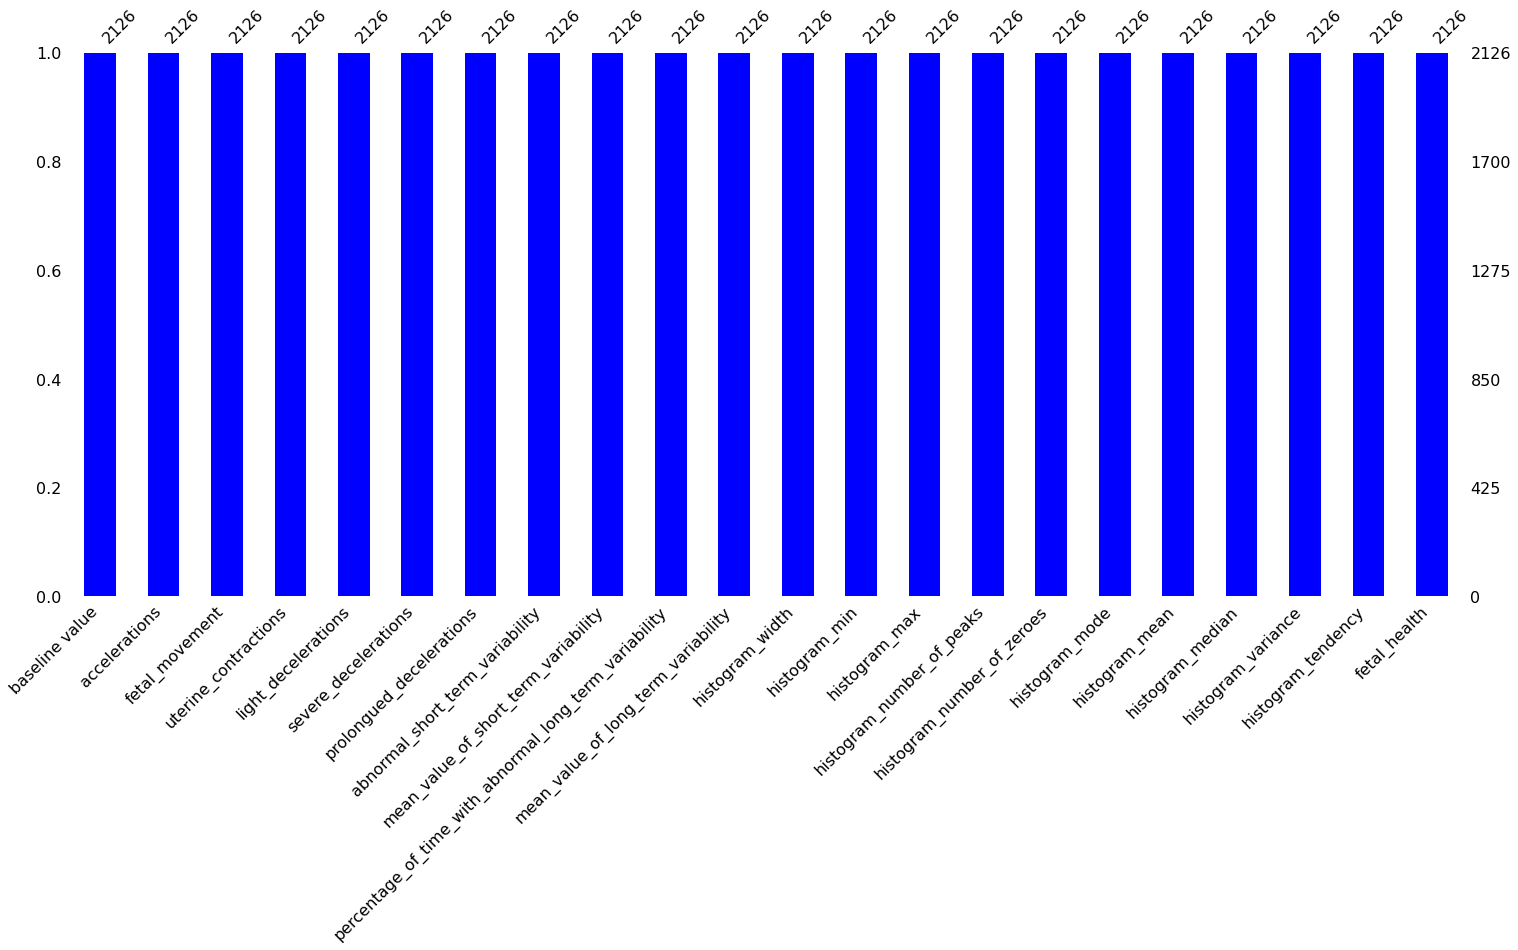

In [11]:
nullbarplot=msno.bar(df,color='blue')

In [12]:
## analyze the taregt column

In [13]:
df['fetal_health'].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

In [14]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

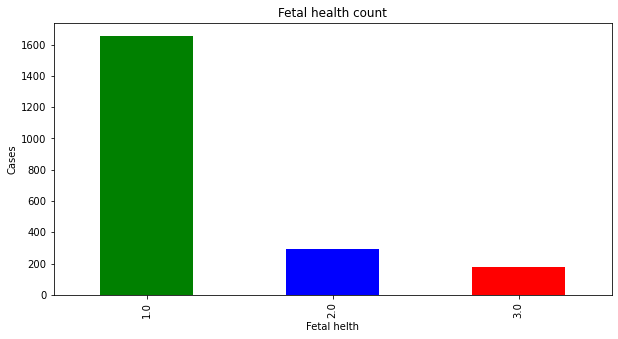

In [15]:
dfcountplot=df.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["green", "blue", "red"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")
plt.show()

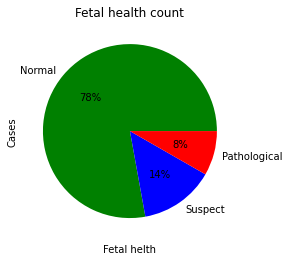

In [16]:
dfpiechart=plt.pie(df.fetal_health.value_counts(), labels=["Normal", "Suspect", "Pathological"], colors = ["green", "blue", "red"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")
plt.show()

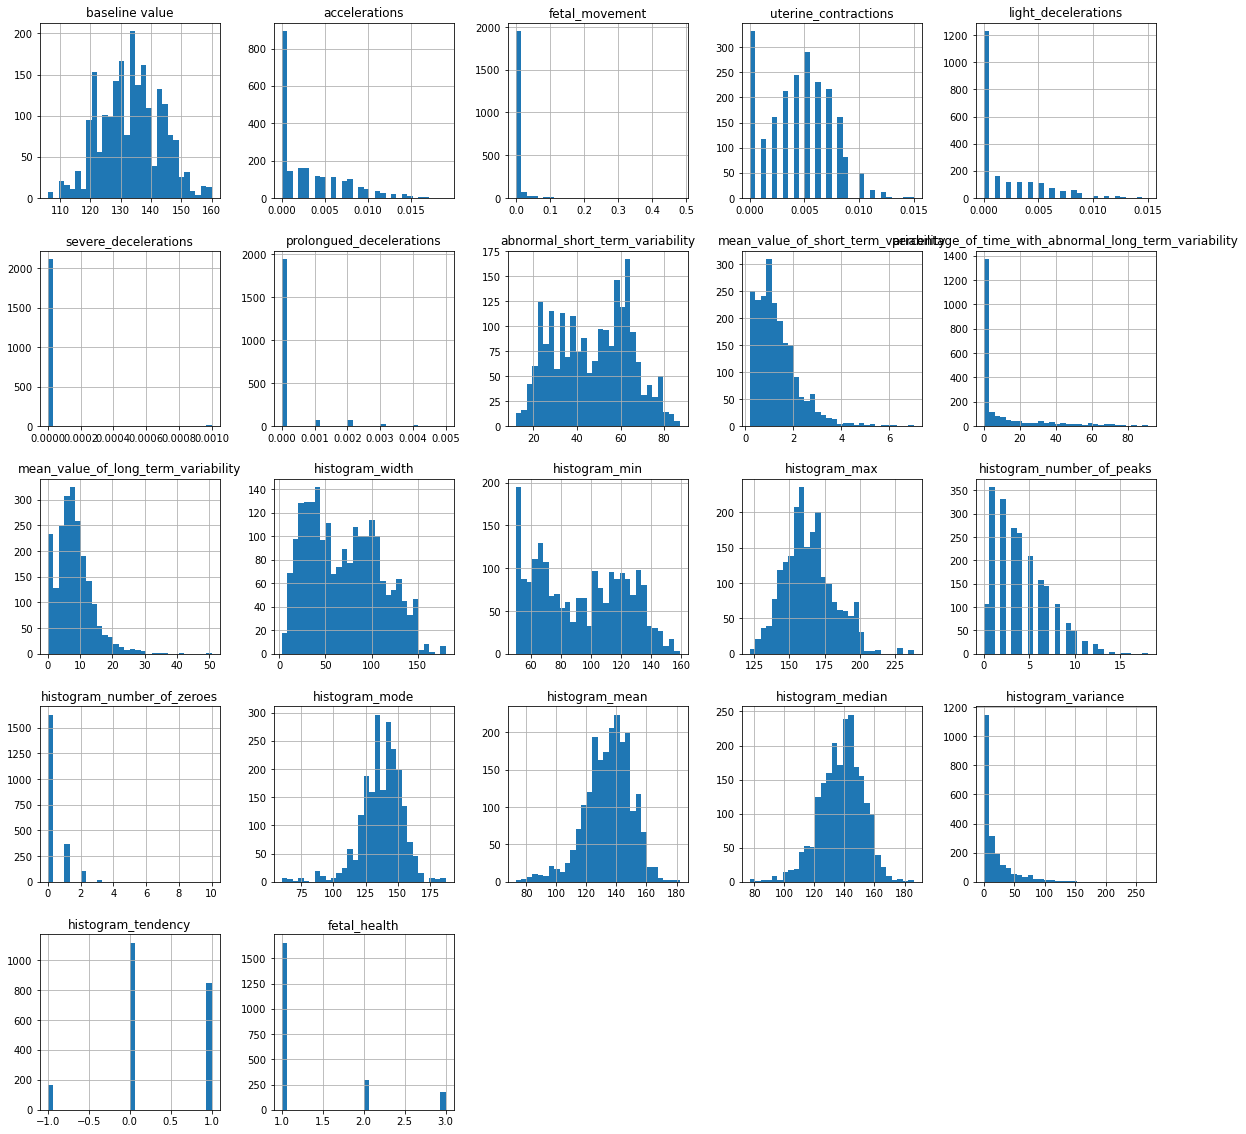

In [17]:
dfhistplot = df.hist(figsize = (20,20),bins=30)

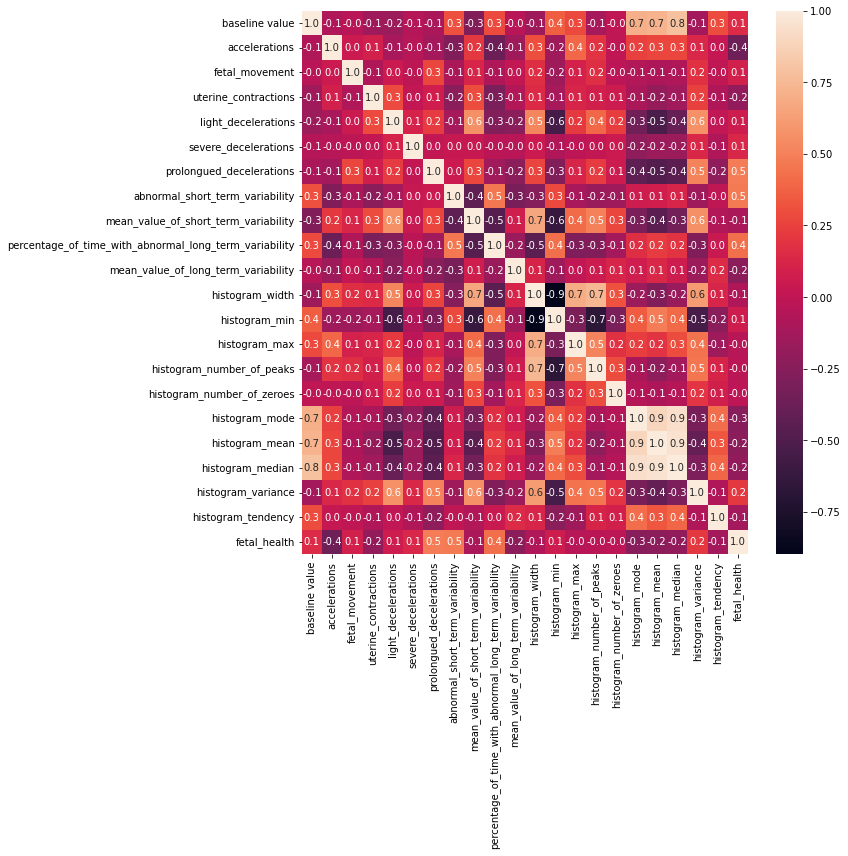

In [18]:
corrmatrix= df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmatrix,annot=True, fmt='.1f')
plt.show()

In [19]:
#scale the data 
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]

In [20]:
column_names = list(X.columns)
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=column_names)

In [21]:
X_scaled.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,...,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03
mean,4.161509e-16,-1.803982e-16,-1.958452e-15,-2.625683e-15,-5.127706e-15,7.254767e-16,4.324961e-15,2.687304e-16,-2.481552e-16,2.291362e-15,...,8.564279e-17,-6.120326e-17,-4.047144e-17,2.408965e-16,8.397171e-17,6.141215e-17,-4.183964e-16,1.404751e-16,-3.634597e-17,5.783500e-16
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,...,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-2.775197e+00,-8.223883e-01,-2.032096e-01,-1.482465e+00,-6.384375e-01,-5.747560e-02,-2.687543e-01,-2.035639e+00,-1.282833e+00,-5.353613e-01,...,-1.731757e+00,-1.474609e+00,-2.342558e+00,-1.379664e+00,-4.584438e-01,-4.729191e+00,-3.951945e+00,-4.223849e+00,-6.492081e-01,-2.162031e+00
25%,-7.423728e-01,-8.223883e-01,-2.032096e-01,-8.034341e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,-8.720881e-01,-7.166031e-01,-5.353613e-01,...,-8.587648e-01,-8.993760e-01,-6.703135e-01,-7.013968e-01,-4.584438e-01,-5.160773e-01,-6.164580e-01,-6.285137e-01,-5.801731e-01,-5.245255e-01
50%,-3.088439e-02,-3.048813e-01,-2.032096e-01,-1.244037e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,1.169297e-01,-1.503732e-01,-5.353613e-01,...,-7.563980e-02,-1.960840e-02,-1.128988e-01,-3.622634e-01,-4.584438e-01,9.451891e-02,8.912573e-02,6.289690e-02,-4.075856e-01,-5.245255e-01
75%,6.806040e-01,7.301328e-01,-1.389076e-01,8.941419e-01,3.752430e-01,-5.747560e-02,-2.687543e-01,8.150599e-01,4.158567e-01,6.270688e-02,...,7.588376e-01,8.939964e-01,5.559989e-01,6.551369e-01,-4.584438e-01,6.440555e-01,6.664215e-01,6.851664e-01,1.792117e-01,1.112980e+00
max,2.713428e+00,4.093929e+00,1.010654e+01,3.610264e+00,4.429965e+00,1.739869e+01,8.208570e+00,2.327675e+00,6.417893e+00,4.412293e+00,...,2.812936e+00,2.213648e+00,4.123453e+00,4.724738e+00,1.370800e+01,3.025381e+00,3.039749e+00,3.312527e+00,8.635997e+00,1.112980e+00


In [22]:
FEATURES=list(X_scaled.columns)
print(FEATURES)

['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']


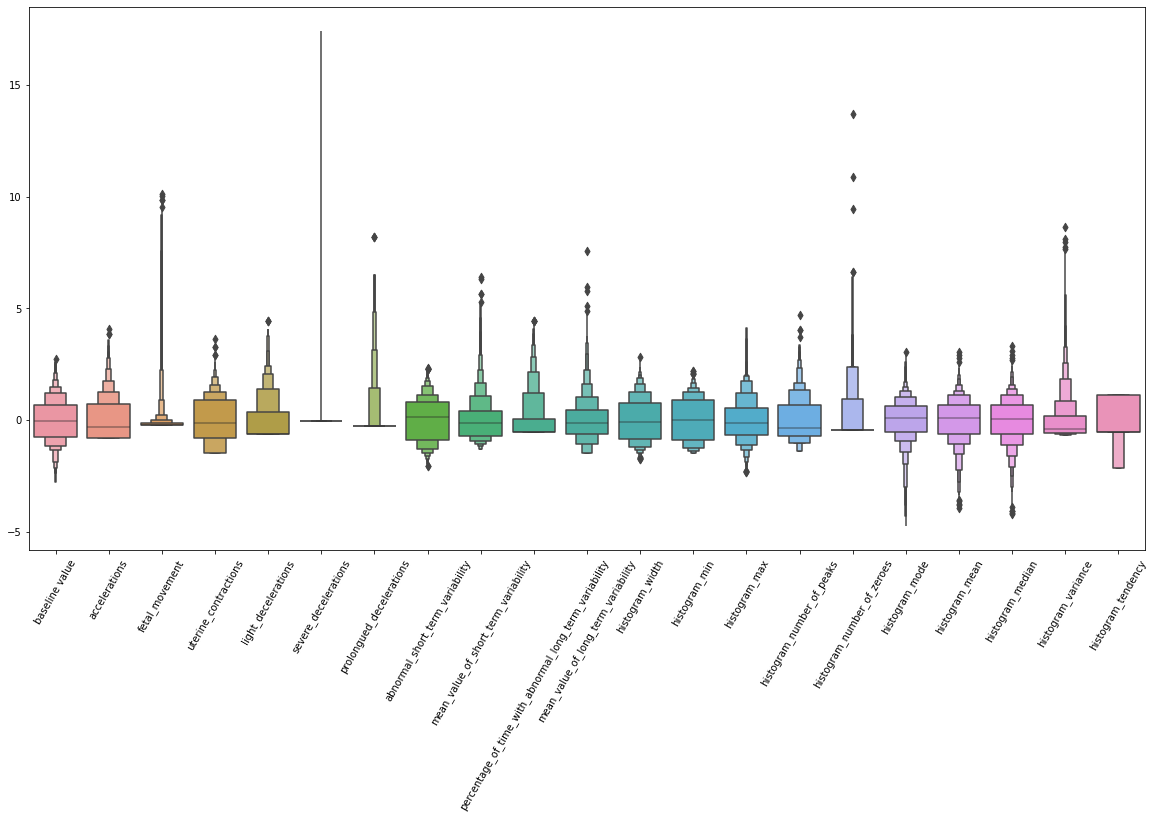

In [23]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled)
plt.xticks(rotation=60)
plt.show()

In [24]:
y.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [25]:
y_adjusted = y - 1 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_adjusted, random_state=19, test_size=0.2)

In [27]:
model_names = ["Logistic Regression",
               "Decision Tree",
               "Random Forest",
               "XGBoost",
               "K-Neighbors",
               "SVM",
               "AdaBoost"]



model_instances = [LogisticRegression(),
                   DecisionTreeClassifier(),
                   RandomForestClassifier(),
                   XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                   KNeighborsClassifier(),
                   SVC(),
                   AdaBoostClassifier()]

model_accuracies = {}

for i in range(len(model_names)):
    name = model_names[i]
    model = model_instances[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(name + ":")
    print("Accuracy: {:.2f}".format(accuracy))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

Logistic Regression:
Accuracy: 0.88
Confusion Matrix:
[[316   8   4]
 [ 23  34   7]
 [  0   9  25]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       328
         1.0       0.67      0.53      0.59        64
         2.0       0.69      0.74      0.71        34

    accuracy                           0.88       426
   macro avg       0.76      0.74      0.75       426
weighted avg       0.87      0.88      0.88       426

------------------------------------------------------------
Decision Tree:
Accuracy: 0.93
Confusion Matrix:
[[314  14   0]
 [ 12  49   3]
 [  1   1  32]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       328
         1.0       0.77      0.77      0.77        64
         2.0       0.91      0.94      0.93        34

    accuracy                           0.93       426
   macro avg       0.88      0.89      0.88   

In [28]:
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

print(f"Best Model: {best_model_name} with Accuracy: {best_model_accuracy:.2f}")


Best Model: XGBoost with Accuracy: 0.94


In [29]:
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 1),
    'colsample_bytree': uniform(0.5, 1)
}


In [30]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=19)


random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_

print("Best Parameters:", best_params)
#print('best_xgb_model:',best_xgb_model)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'colsample_bytree': 0.8427781541032272, 'learning_rate': 0.11029345860829413, 'max_depth': 3, 'n_estimators': 163, 'subsample': 0.5441672226629682}


In [35]:
y_pred_best_xgb = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best_xgb)
print("Tuned XGBoost Accuracy: {:.3f}".format(accuracy))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_best_xgb))

Tuned XGBoost Accuracy: 0.951
Confusion Matrix:
[[325   3   0]
 [ 15  48   1]
 [  1   1  32]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       328
         1.0       0.92      0.75      0.83        64
         2.0       0.97      0.94      0.96        34

    accuracy                           0.95       426
   macro avg       0.95      0.89      0.92       426
weighted avg       0.95      0.95      0.95       426



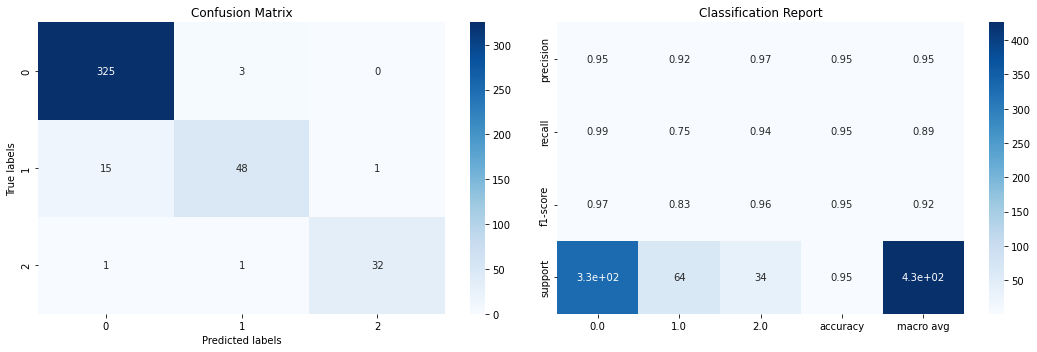

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred_best_xgb)
class_report = classification_report(y_test, y_pred_best_xgb, output_dict=True)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')

report_df = pd.DataFrame(class_report).T
sns.heatmap(report_df.iloc[:-1, :].T, cmap='Blues',annot=True, ax=ax[1])
ax[1].set_title('Classification Report')


plt.tight_layout()

plt.show()